# ALL REQUIRED LIBRARIES

In [45]:
import pandas as pd                   # For data handling
import matplotlib.pyplot as plt       # For plotting graphs
import seaborn as sns                 # For improved visualizations
import numpy as np                    # For numerical operations

from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression   # ML model
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation

## STEP 1:DATA LOADING

In [46]:
class LoanDataLoader:
    """
    This class is used to load and preview loan data from a CSV file.
    """
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None

    def load_data(self):
        """
        Loads CSV data into a pandas DataFrame.
        """
        self.df = pd.read_csv(self.file_path)
        print("Data loaded successfully.")
        return self.df

    def preview_data(self, rows=5):
        """
        Displays the top rows of the DataFrame.
        """
        if self.df is not None:
            return self.df.head(rows)
        else:
            print("Data not loaded yet.")
            return None
        
loader = LoanDataLoader("LoanData.csv")
loan_df = loader.load_data()
loader.preview_data()



Data loaded successfully.


,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,41.0,17,12,176.0,9.3,11.359392,5.008608,3.0,1
1,27.0,10,6,31.0,17.3,1.362202,4.000798,1.0,0
2,40.0,15,7,NaN,5.5,0.856075,2.168925,1.0,0
3,41.0,15,14,120.0,2.9,2.658720,0.821280,NaN,0
4,24.0,2,0,28.0,17.3,1.787436,3.056564,2.0,1


## STEP 2:CLEAN DATA

In [47]:
class LoanDataCleaner:
    """
    This class is responsible for cleaning the loan data by handling missing values.
    """
    def __init__(self, df):
        self.df = df

    def check_missing(self):
        """
        Prints the number of missing values per column.
        """
        missing = self.df.isnull().sum()
        print("Missing Values:\n", missing)
        return missing

    def clean_missing(self):
        """
        Fills missing values using median or mode strategy without inplace to avoid warnings.
        """
        self.df["age"] = self.df["age"].fillna(self.df["age"].median())
        self.df["income"] = self.df["income"].fillna(self.df["income"].median())
        self.df["ed"] = self.df["ed"].fillna(self.df["ed"].mode()[0])
        print("Missing values cleaned.")
        return self.df
    
cleaner = LoanDataCleaner(loan_df)
cleaner.check_missing()
cleaned_df = cleaner.clean_missing()



Missing Values:
 age         20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
ed          20
default      0
dtype: int64
Missing values cleaned.


## STEP 3:VISUALIZATION

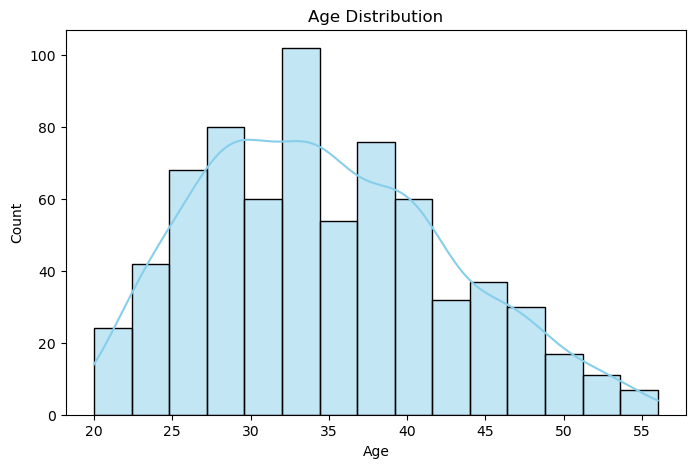

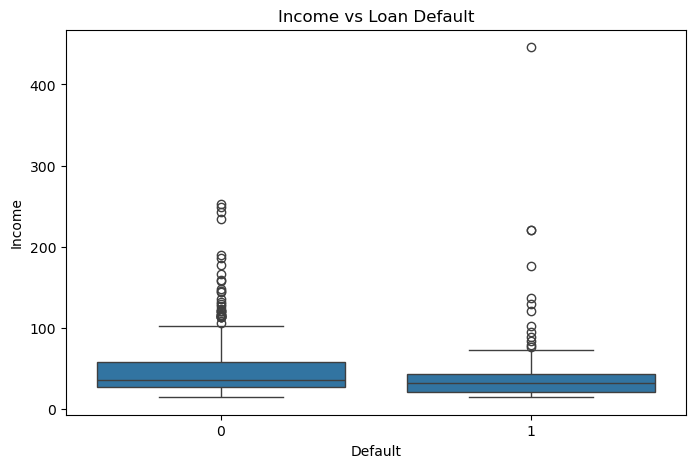

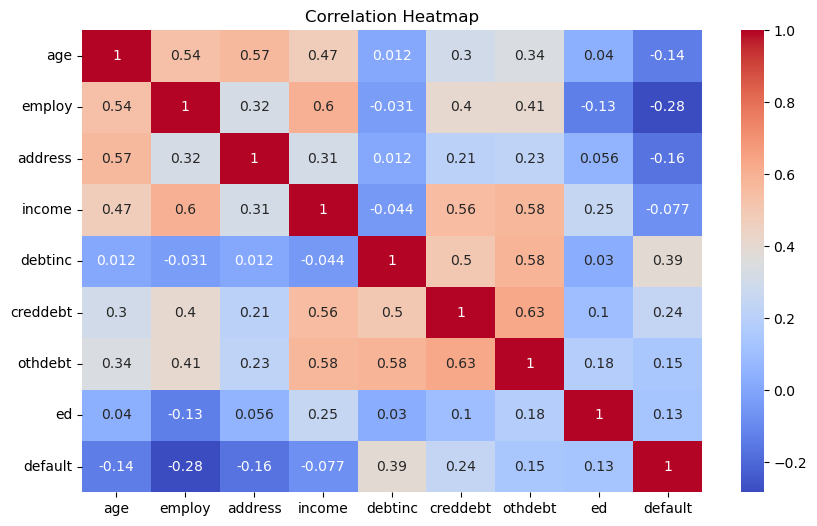

In [48]:
class LoanDataVisualizer:
    """
    Visualize age, income, and correlation from loan data.
    """
    def __init__(self, df):
        self.df = df

    def plot_age_distribution(self):
        plt.figure(figsize=(8,5))
        sns.histplot(self.df["age"], kde=True, color='skyblue')
        plt.title("Age Distribution")
        plt.xlabel("Age")
        plt.ylabel("Count")
        plt.show()

    def plot_income_vs_default(self):
        plt.figure(figsize=(8,5))
        sns.boxplot(x="default", y="income", data=self.df)
        plt.title("Income vs Loan Default")
        plt.xlabel("Default")
        plt.ylabel("Income")
        plt.show()

    def plot_correlation_heatmap(self):
        plt.figure(figsize=(10,6))
        sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()

visualizer = LoanDataVisualizer(cleaned_df)
visualizer.plot_age_distribution()
visualizer.plot_income_vs_default()
visualizer.plot_correlation_heatmap()



## STEP 4:MODEL TRAINING

In [49]:
class LoanModelTrainer:
    """
    This class is used to train and evaluate a Logistic Regression model
    to predict loan default based on applicant features.
    """
    def __init__(self, df):
        self.df = df
        self.model = None

    def train_model(self):
        """
        Trains a logistic regression model and prints evaluation metrics.
        """
        X = self.df[["age", "employ", "income", "debtinc", "creddebt", "othdebt", "ed"]]
        y = self.df["default"]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Logistic Regression model
        self.model = LogisticRegression()
        self.model.fit(X_train, y_train)

        # Prediction
        y_pred = self.model.predict(X_test)

        # Results
        print("Model trained successfully.")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

        return self.model
    
trainer = LoanModelTrainer(cleaned_df)
trained_model = trainer.train_model()



Model trained successfully.
Accuracy: 0.8714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       102
           1       0.92      0.58      0.71        38

    accuracy                           0.87       140
   macro avg       0.89      0.78      0.81       140
weighted avg       0.88      0.87      0.86       140



### THANK YOU ###